In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("adult.csv")

In [31]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Подготовка датасета

In [32]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [33]:
X, y = df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']], df['income']

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
X = pd.get_dummies(X)

In [37]:
del X['fnlwgt']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
X_train.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
39950,23,10,0,0,30,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21318,28,13,0,0,45,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
28265,46,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
20169,46,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33241,62,10,0,1977,98,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_text = sc.transform(X_test)

## Пробуем обучить модель

Добавим для сравнения модели KNeighborsClassifier и DecisionTreeClassifier

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
%time
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.23558315703268956

KNN

In [46]:
%time
knr = KNeighborsClassifier()
knr.fit(X_train, y_train)
knr.score(X_test, y_test)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


0.7713778748379172

DecisionTree

In [48]:
dtr = DecisionTreeClassifier()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [26]:
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1.0, 10.0]

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve

In [40]:
params = []
lines = []
scores = []

for p in penalty:
    for c in C:
        lr = LogisticRegression(penalty=p, C=c)
        lr.fit(X_train, y_train)
        
        probas = lr.predict_proba(X_test)[:, 1]
        
        params.append((p, c))
        scores.append(roc_auc_score(y_test, probas))
        lines.append(roc_curve(y_test, probas))

/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

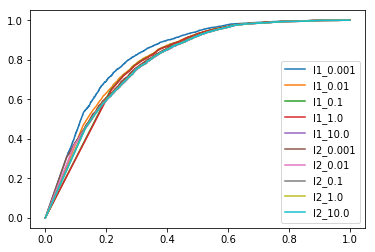

In [44]:
for i in range((len(params))):
    plt.plot(lines[i][0], lines[i][1], label='{}_{}'.format(params[i][0], params[i][1]))

plt.legend()
plt.show()

In [45]:
for i in range((len(params))):
    print('{}_{}: {}'.format(params[i][0], params[i][1], scores[i]))

l1_0.001: 0.8287297645871007
l1_0.01: 0.8074969488875929
l1_0.1: 0.7953613421179992
l1_1.0: 0.7940699948952419
l1_10.0: 0.7926925237474605
l2_0.001: 0.801327927825874
l2_0.01: 0.7960894493599764
l2_0.1: 0.7941082920928542
l2_1.0: 0.7937058901089928
l2_10.0: 0.7936144066229133


## KNN
для KNN будем подбирать n_neighbors

In [51]:
import numpy as np

In [60]:
neighbors_test_length = 9

In [67]:
params = []
lines = []
scores = []

for n in range(1,neighbors_test_length):
    knr = KNeighborsClassifier(n_neighbors = n, n_jobs = -1)
    knr.fit(X_train, y_train)
        
    probas = knr.predict_proba(X_test)[:, 1]
        
    params.append(n)
    scores.append(roc_auc_score(y_test, probas))
    lines.append(roc_curve(y_test, probas))

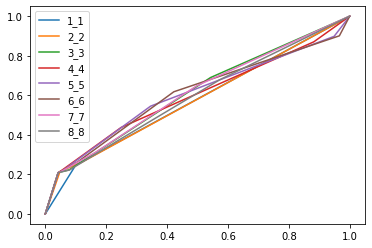

In [70]:
for i in range((len(params))):
    plt.plot(lines[i][0], lines[i][1], label='{}_{}'.format(params[i], params[i]))

plt.legend()
plt.show()

In [75]:
for i in range((len(params))):
    print('{} - {}: {}'.format( "n_neighbours", params[i], scores[i]))

n_neighbours - 1: 0.5733556188028652
n_neighbours - 2: 0.5773028355873291
n_neighbours - 3: 0.6104306585562889
n_neighbours - 4: 0.5952375108661772
n_neighbours - 5: 0.6016904011322446
n_neighbours - 6: 0.6038782877459935
n_neighbours - 7: 0.6100095117521268
n_neighbours - 8: 0.5934868963963345


Лучшие варианты с количеством n_neighbours - 3 и 7

## DecisionTreeClassifier

In [76]:
depth = 10

In [77]:
params = []
lines = []
scores = []

for n in range(1,depth+1):
    dtr = DecisionTreeClassifier(max_depth = n)
    dtr.fit(X_train, y_train)
        
    probas = dtr.predict_proba(X_test)[:, 1]
        
    params.append(n)
    scores.append(roc_auc_score(y_test, probas))
    lines.append(roc_curve(y_test, probas))

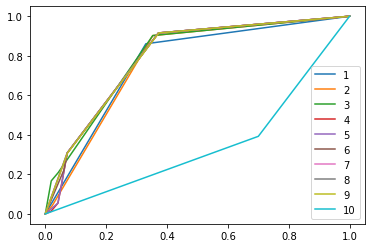

In [81]:
for i in range((len(params))):
    plt.plot(lines[i][0], lines[i][1], label='{}'.format(params[i]))

plt.legend()
plt.show()

 похоже из графика видно что при глубине 10 - дерево сильно переобучилось

In [83]:
for i in range((len(params))):
    print('{} - {}: {}'.format( "max_depth", params[i], scores[i]))

max_depth - 1: 0.7651664186786831
max_depth - 2: 0.7716509001275854
max_depth - 3: 0.7939011146062421
max_depth - 4: 0.7913384528549895
max_depth - 5: 0.7916553733252795
max_depth - 6: 0.7947280587532379
max_depth - 7: 0.7962221031622424
max_depth - 8: 0.7962221031622424
max_depth - 9: 0.7953912537605534
max_depth - 10: 0.34634851703254854


от 3-х до 9 - глубина хорошая - я бы выбрал 3